In [3]:


import datetime
import numpy as np
import pandas as pd

import pickle
import scipy
import scipy.sparse as sp

#from utils import tf_idf

In [4]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

In [5]:
INPUT_DATA_FOLDER = "final_data"

ISW_DATA_FILE = "all_isw.csv"
WEATHER_EVENTS_DATA_FILE = "all_hourly_weather_events.csv"

MODEL_FOLDER = "model"

tfidf_transformer_model = "tfidf_transformer"
count_vertorizer_model = "count_vectorizer"
alarm_classifier = "alarm_classifier"

tfidf_transformer_version = "v1"
count_vertorizer_version = "v1"
alarm_classifier_version = "v1"

In [6]:
def isNaN(num):
    return num != num

In [7]:
df_isw = pd.read_csv(f"data/{INPUT_DATA_FOLDER}/{ISW_DATA_FILE}", sep=";")

In [8]:
df_isw.head(5)

,Unnamed: 0,date,title,text_title,text_main,main_html_v8,main_html,main_html1,main_html2,main_html3,main_html4,data_stemmed,data_lemmatized,keywords,report_date,date_tomorrow_datetime
0,1,2022-02-25,Russia-Ukraine Warning Update: Russian Offensi...,Russia-Ukraine Warning Update: Russian Offensi...,"<div class=""field field-name-body field-type-t...",\nRussian forces entered major Ukrainian citie...,\nrussian forces entered major ukrainian citie...,russian forces entered major ukrainian cities...,russian forces entered major ukrainian cities...,russian forces entered major ukrainian cities...,russian forces entered major ukrainian cities...,russian forc enter major ukrainian cities—inc...,russian force entered major ukrainian cities—...,"{'february': 0.339, 'kyiv': 0.323, 'pm': 0.295...",2022-02-25,2022-02-26
1,2,2022-02-26,Russia-Ukraine Warning Update: Russian Offensi...,Russia-Ukraine Warning Update: Russian Offensi...,"<div class=""field field-name-body field-type-t...",\nRussian forces’ main axes of advance in the ...,\nrussian forces’ main axes of advance in the ...,russian forces’ main axes of advance in the l...,russian forces’ main axes of advance in the l...,russian forces main axes of advance in the la...,russian forces main axes advance last twenty ...,russian forc main axe advanc last twenti four...,russian force main ax advance last twenty fou...,"{'february': 0.409, 'kyiv': 0.367, 'twenty': 0...",2022-02-26,2022-02-27
2,3,2022-02-27,Russia-Ukraine Warning Update: Russian Offensi...,Russia-Ukraine Warning Update: Russian Offensi...,"<div class=""field field-name-body field-type-t...",\nThe Russian military has likely recognized t...,\nthe russian military has likely recognized t...,the russian military has likely recognized th...,the russian military has likely recognized th...,the russian military has likely recognized th...,russian military likely recognized initial ex...,russian militari like recogn initi expect lim...,russian military likely recognized initial ex...,"{'february': 0.496, 'seven': 0.349, 'twenty': ...",2022-02-27,2022-02-28
3,4,2022-02-28,"Russian Offensive Campaign Assessment, Februar...","Russian Offensive Campaign Assessment, Februar...","<div class=""field field-name-body field-type-t...",The Russian military is reorganizing its milit...,the russian military is reorganizing its milit...,the russian military is reorganizing its milit...,the russian military is reorganizing its milit...,the russian military is reorganizing its mili...,russian military reorganizing military effort...,russian militari reorgan militari effort atte...,russian military reorganizing military effort...,"{'february': 0.553, 'eight': 0.349, 'twenty': ...",2022-02-28,2022-03-01
4,5,2022-03-01,"Russian Offensive Campaign Assessment, March 1...","Russian Offensive Campaign Assessment, March 1","<div class=""field field-name-body field-type-t...",Russian forces are completing the reinforcemen...,russian forces are completing the reinforcemen...,russian forces are completing the reinforcemen...,russian forces are completing the reinforcemen...,russian forces are completing the reinforceme...,russian forces completing reinforcement resup...,russian forc complet reinforc resuppli troop ...,russian force completing reinforcement resupp...,"{'kyiv': 0.359, 'chernihiv': 0.218, 'hour': 0....",2022-03-01,2022-03-02


In [9]:
df_weather_events = pd.read_csv(f"data/{INPUT_DATA_FOLDER}/{WEATHER_EVENTS_DATA_FILE}", sep=";")

In [10]:
df_weather_events.head(10)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_datetime,hour_datetimeEpoch,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,city,region,center_city_ua,center_city_en,region_alt,region_id,event_region_title,event_region_city,event_all_region,event_start,event_end,event_clean_end,event_intersection_alarm_id,event_start_time,event_end_time,event_start_hour,event_end_hour,event_day_date,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch
0,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,00:00:00,1645653600,2.4,89.18,0.8,0.000,0.0,0.1,0.2,['snow'],31.3,15.5,275.6,1020.0,0.0,91.5,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,01:00:00,1645657200,2.4,87.90,0.6,0.000,0.0,0.0,0.2,['snow'],27.7,14.8,280.3,1021.0,0.2,88.2,0.0,NaN,0.0,10.0,Partially cloudy,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,02:00:00,1645660800,2.9,88.58,1.2,0.000,0.0,0.0,0.1,['snow'],29.2,14.4,310.0,1022.0,10.0,100.0,NaN,NaN,NaN,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,03:00:00,1645664400,2.3,86.63,0.3,0.000,0.0,0.0,0.1,['snow'],23.8,13.3,295.1,1021.0,0.1,92.0,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,04:00:00,1645668000,1.9,87.85,0.1,0.000,0.0,0.0,0.1,['snow'],24.5,13.3,305.8,1021.0,0.0,93.8,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,05:00:00,1645671600,1.9,91.66,0.6,0.000,0.0,0.0,0.1,NaN,23.4,10.8,296.0,1022.5,10.0,100.0,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,06:00:00,1645675200,2.0,93.09,1.0,0.000,0.0,0.0,0.1,['snow'],20.9,10.8,300.0,1021.0,10.0,100.0,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,07:00:00,1645678800,2.0,93.09,1.0,0.000,0.0,0.0,0.1,['snow'],19.1,10.8,300.0,1022.0,10.0,100.0,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,08:00:00,1645682400,1.8,91.32,0.6,0.118,100.0,0.0,0.1,['snow'],16.9,7.2,303.0,1024.2,4.4,100.0,NaN,NaN,NaN,10.0,"Snow, Overcast",Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [11]:
df_weather_events.drop(df_weather_events.loc[(df_weather_events["day_datetime"] == "2022-02-24")].index, inplace=True)

In [12]:
df_weather_events.drop(df_weather_events.loc[(df_weather_events["day_datetime"] == "2022-02-25")].index, inplace=True)

In [13]:
df_weather_events.sample(10).head(10)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_datetime,hour_datetimeEpoch,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,city,region,center_city_ua,center_city_en,region_alt,region_id,event_region_title,event_region_city,event_all_region,event_start,event_end,event_clean_end,event_intersection_alarm_id,event_start_time,event_end_time,event_start_hour,event_end_hour,event_day_date,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch
95240,"Хмельницька область, Україна",2022-11-21,1668981600,-0.1,-1.7,-0.6,-1.3,95.1,6.400,50.00,23.0,1.9,1.0,07:32:01,16:23:26,0.90,02:00:00,1668988800,-0.2,94.33,-1.0,0.0,0.0,0.0,9.2,NaN,7.2,0.7,224.3,1013.0,24.1,100.0,0.0,NaN,0.0,10.0,Overcast,Хмельницький,Хмельницька,Хмельницький,Khmelnytskyi,Хмельниччина,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124926,"Рівне, Україна",2022-07-27,1658869200,23.0,17.6,19.7,15.6,78.5,9.004,8.33,142.3,12.2,6.0,05:34:45,21:07:29,0.94,20:00:00,1658941200,21.6,66.94,15.2,0.0,0.0,0.0,0.0,NaN,13.0,6.5,312.1,1014.0,24.1,86.5,63.0,0.2,1.0,10.0,Partially cloudy,Рівне,Рівненська,Рівне,Rivne,Рівненщина,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151999,"Полтава, Україна",2022-10-18,1666040400,19.0,3.7,10.9,2.1,58.4,0.000,0.00,129.7,11.2,5.0,07:07:28,17:45:43,0.74,05:00:00,1666058400,3.9,83.14,1.3,0.0,0.0,0.0,0.0,NaN,7.2,4.0,231.5,1032.0,24.1,2.1,0.0,NaN,0.0,10.0,Clear,Полтава,Полтавська,Полтава,Poltava,Полтавщина,16,Полтавщина,Полтавська обл.,1.0,2022-10-18 02:19:17,2022-10-18 03:09:56,2022-10-18 03:09:56,NaN,2022-10-18 02:19:17,2022-10-18 03:09:56,2022-10-18 02:00:00,2022-10-18 04:00:00,2022-10-18,1.666058e+09,1.666066e+09,2022-10-18 02:00:00,1.666058e+09
66193,"Одеса, Україна",2022-09-03,1662152400,21.7,14.4,18.2,10.5,62.1,1.000,4.17,91.1,7.7,5.0,06:19:20,19:32:46,0.22,00:00:00,1662152400,21.4,44.15,8.7,0.0,0.0,0.0,0.0,NaN,39.6,32.4,70.0,1017.8,45.0,80.0,0.0,NaN,0.0,10.0,Partially cloudy,Одеса,Одеська,Одеса,Odesa,Одещина,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95807,"Хмельницька область, Україна",2022-12-14,1670968800,-2.6,-6.3,-4.5,-6.7,84.8,0.100,4.17,44.4,3.9,2.0,08:00:31,16:12:52,0.68,17:00:00,1671030000,-4.3,83.34,-6.7,0.0,0.0,0.0,2.6,NaN,21.2,10.1,138.6,1016.0,24.1,98.9,0.0,NaN,0.0,10.0,Overcast,Хмельницький,Хмельницька,Хмельницький,Khmelnytskyi,Хмельниччина,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38850,"Херсон, Україна",2022-05-20,1652994000,22.9,9.4,16.8,8.7,59.9,0.000,0.00,300.7,26.0,9.0,05:10:04,20:22:51,0.64,18:00:00,1653058800,22.2,42.88,8.9,0.0,0.0,0.0,0.0,NaN,24.8,14.4,230.0,1020.0,10.0,50.0,189.0,0.7,2.0,10.0,Partially cloudy,Херсон,Херсонська,Херсон,Kherson,Херсонщина,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160487,"Львів, Україна",2022-11-02,1667340000,14.2,8.9,11.2,9.1,87.2,0.000,0.00,83.8,7.2,4.0,07:14:31,16:59:43,0.25,13:00:00,1667386800,13.8,78.36,10.1,0.0,0.0,0.0,0.0,NaN,38.2,15.1,293.0,1020.0,24.1,93.0,345.0,1.2,3.0,10.0,Overcast,Львів,Львівська,Львів,Lviv,Львівщина,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60322,"Чернігів, Україна",2022-12-14,1670968800,-1.9,-5.3,-3.2,-6.3,79.4,0.000,0.00,32.5,2.7,2.0,07:53:04,15:45:44,0.68,12:00:00,1671012000,-2.3,76.90,-5.8,0.0,0.0,0.0,1.2,NaN,30.6,14.8,260.1,1016.0,24.1,71.7,195.0,0.7,2.0,10.0,Partially cloudy,Чернігів,Чернігівська,Чернігів,Chernihiv,Чернігівщина,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171763,"Черкаси, Україна",2022-04-10,1649538000,11.0,6.5,8.2,5.1,81.0,

In [14]:
df_isw_short = df_isw[["report_date", "date_tomorrow_datetime", "keywords", "text_main", "data_lemmatized",]]

In [15]:
df_isw_short = df_isw_short.copy().add_prefix('isw_')


In [16]:
df_isw_short = df_isw_short.drop(index=0)

In [17]:
df_isw_short.head(10)

,isw_report_date,isw_date_tomorrow_datetime,isw_keywords,isw_text_main,isw_data_lemmatized
1,2022-02-26,2022-02-27,"{'february': 0.409, 'kyiv': 0.367, 'twenty': 0...","<div class=""field field-name-body field-type-t...",russian force main ax advance last twenty fou...
2,2022-02-27,2022-02-28,"{'february': 0.496, 'seven': 0.349, 'twenty': ...","<div class=""field field-name-body field-type-t...",russian military likely recognized initial ex...
3,2022-02-28,2022-03-01,"{'february': 0.553, 'eight': 0.349, 'twenty': ...","<div class=""field field-name-body field-type-t...",russian military reorganizing military effort...
4,2022-03-01,2022-03-02,"{'kyiv': 0.359, 'chernihiv': 0.218, 'hour': 0....","<div class=""field field-name-body field-type-t...",russian force completing reinforcement resupp...
5,2022-03-02,2022-03-03,"{'march': 0.563, 'kyiv': 0.392, 'chernihiv': 0...","<div class=""field field-name-body field-type-t...",russian force resumed offensive operation sup...
6,2022-03-03,2022-03-04,"{'march': 0.591, 'eu': 0.179, 'foreign': 0.179...","<div class=""field field-name-body field-type-t...",critical threat project aei march isw publish...
7,2022-03-04,2022-03-05,"{'march': 0.602, 'nato': 0.162, 'lukashenko': ...","<div class=""field field-name-body field-type-t...",critical threat project aei march isw publish...
8,2022-03-05,2022-03-06,"{'reservist': 0.395, 'reserve': 0.269, 'conscr...","<div class=""field field-name-body field-type-t...",early announcement spring draft unlikely incr...
9,2022-03-06,2022-03-07,"{'march': 0.546, 'oil': 0.192, 'ceasefire': 0....","<div class=""field field-name-body field-type-t...",critical threat project aei march isw publish...
10,2022-03-07,2022-03-08,"{'march': 0.344, 'zaporizhya': 0.28, 'kyiv': 0...","<div class=""field field-name-body field-type-t...",russian force concentrating eastern northwest...


In [18]:
# df.dtypes

In [19]:
df = df_weather_events.merge(df_isw_short,
                            how = "left",
                            left_on = "day_datetime", 
                            right_on = "isw_date_tomorrow_datetime")

In [20]:
df.shape

(193980, 64)

In [21]:
# len(df["city_resolvedAddress"].unique())

In [22]:
# df["city_resolvedAddress"].unique()

In [23]:
# df.sample(5).head(5)
# df.loc[df["city_resolvedAddress"] == "Луцьк, Луцький район, Україна"][47:49]

In [24]:
# df.sample(5).head(5)
# df.loc[df["city_resolvedAddress"] == "Кропивницький, Україна"][47:49]

In [25]:
# df.sample(5).head(5)
 #df.loc[df["city_resolvedAddress"] == "Дніпро, Україна"][47:49]

In [26]:

# df.loc[df["isw_date_tomorrow_datetime"] == "2022-02-25"]

In [27]:
df_work = df.assign(is_alarm=lambda x: x['event_day_date'].notnull().astype(int))

In [28]:
df_work.head(5)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_datetime,hour_datetimeEpoch,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,city,region,center_city_ua,center_city_en,region_alt,region_id,event_region_title,event_region_city,event_all_region,event_start,event_end,event_clean_end,event_intersection_alarm_id,event_start_time,event_end_time,event_start_hour,event_end_hour,event_day_date,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch,isw_report_date,isw_date_tomorrow_datetime,isw_keywords,isw_text_main,isw_data_lemmatized,is_alarm
0,"Луцьк, Луцький район, Україна",2022-02-26,1645826400,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,00:00:00,1645826400,0.3,82.07,-2.4,0.0,0.0,0.0,0.0,NaN,14.4,7.9,294.8,1022.0,24.1,0.0,0.0,NaN,0.0,10.0,Clear,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,"Луцьк, Луцький район, Україна",2022-02-26,1645826400,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,01:00:00,1645830000,0.1,82.04,-2.6,0.0,0.0,0.0,0.0,NaN,13.7,5.4,289.0,1023.0,24.1,0.0,0.0,NaN,0.0,10.0,Clear,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,"Луцьк, Луцький район, Україна",2022-02-26,1645826400,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,02:00:00,1645833600,-0.8,89.99,-2.3,0.0,0.0,0.0,0.0,NaN,12.2,5.7,268.0,1023.6,10.0,90.0,NaN,NaN,NaN,10.0,Partially cloudy,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,"Луцьк, Луцький район, Україна",2022-02-26,1645826400,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,03:00:00,1645837200,-0.1,83.24,-2.6,0.0,0.0,0.0,0.0,NaN,8.3,5.0,268.6,1024.0,24.1,63.6,0.0,NaN,0.0,10.0,Partially cloudy,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,"Луцьк, Луцький район, Україна",2022-02-26,1645826400,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,04:00:00,1645840800,0.0,83.26,-2.5,0.0,0.0,0.0,0.0,NaN,8.6,5.0,265.8,1024.0,24.1,73.6,0.0,NaN,0.0,10.0,Partially cloudy,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [29]:
df.loc[1, "isw_data_lemmatized"]

nan

In [30]:
df_work.shape

(193980, 65)

<Axes: xlabel='is_alarm'>

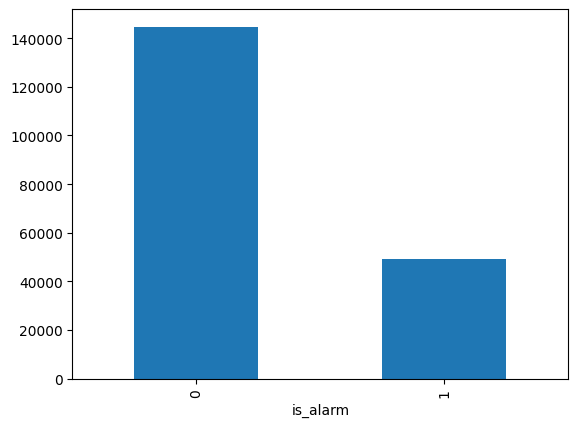

In [31]:
import matplotlib

df_work["is_alarm"].value_counts(dropna=False).plot(kind='bar')

In [32]:
# df_work['isw_data_lemmatized'] = df_work['isw_data_lemmatized'].astype('string')

In [33]:
df_work['day_datetime'] = pd.to_datetime(df_work['day_datetime'])

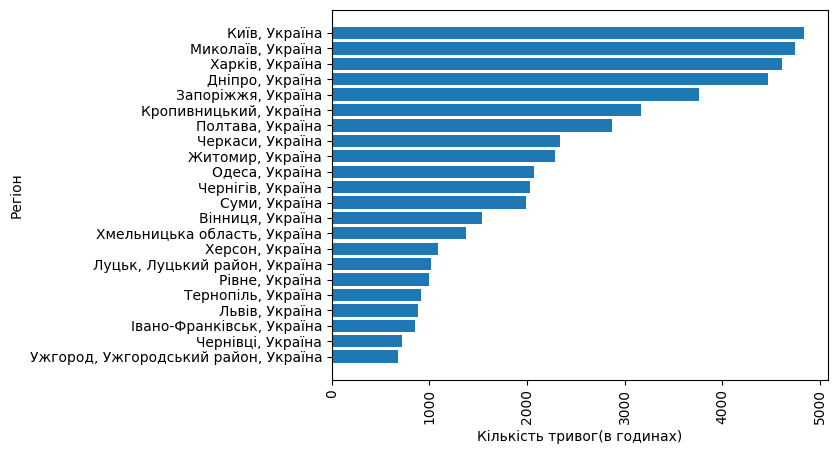

In [34]:
import matplotlib.pyplot as plt

df_filtered = df_work[df_work['is_alarm'] == 1]

result = df_filtered.groupby('city_resolvedAddress').size().sort_values()

plt.barh(result.index, result.values)

plt.ylabel('Регіон')
plt.xlabel('Кількість тривог(в годинах)')

plt.xticks(rotation=90)

plt.show()

In [35]:
df_work.shape

(193980, 65)

In [36]:
# df_quarter = df_work.iloc[::4]

In [37]:
# df_quarter.shape

In [38]:
# df_filtered = df_quarter[df_quarter['is_alarm'] == 1]

# result = df_filtered.groupby('city_resolvedAddress').size().sort_values()

# plt.barh(result.index, result.values)

# plt.ylabel('Регіон')
# plt.xlabel('Кількість тривог(в годинах)')

# plt.xticks(rotation=90)

# plt.show()

In [39]:
# new_dates = pd.date_range(start='2022-02-26', end='2023-01-20', freq='2D')
# new_df = pd.DataFrame({'day_datetime': new_dates})

# df_half = pd.merge(df_work, new_df, on='day_datetime')

In [40]:
# df_half.shape

In [41]:
# df_filtered = df_half[df_half['is_alarm'] == 1]

# result = df_filtered.groupby('city_resolvedAddress').size().sort_values()

# plt.barh(result.index, result.values)

# plt.ylabel('Регіон')
# plt.xlabel('Кількість тривог(в годинах)')

# plt.xticks(rotation=90)

# plt.show()

In [42]:
df_work['day_of_week'] = df_work['day_datetime'].dt.day_name()
#df_half['day_of_week'] = df_half['day_datetime'].dt.day_name()

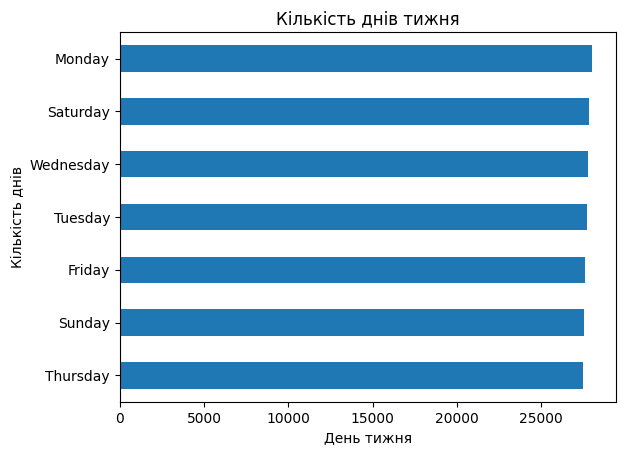

In [43]:
counts = df_work.groupby('day_of_week').size().sort_values()

counts.plot(kind='barh')
plt.xlabel('День тижня')
plt.ylabel('Кiлькiсть днiв')
plt.title('Кількість днiв тижня')
plt.show()

In [44]:
# counts = df_half.groupby('day_of_week').size().sort_values()

# counts.plot(kind='barh')
# plt.xlabel('День тижня')
# plt.ylabel('Кiлькiсть днiв')
# plt.title('Кількість днiв тижня (кожен другий день)')
# plt.show()

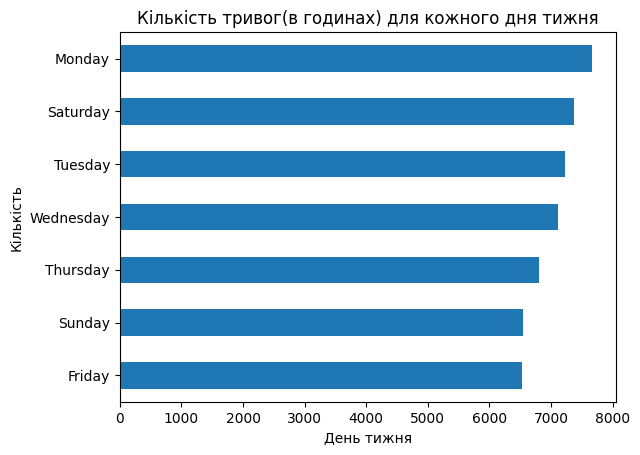

In [45]:
counts = df_work.groupby(['day_of_week', 'is_alarm']).size().unstack().sort_values(by=1, ascending=True)

counts[1].plot(kind='barh')
plt.xlabel('День тижня')
plt.ylabel('Кількість')
plt.title('Кількість тривог(в годинах) для кожного дня тижня')
plt.show()

In [46]:
# counts = df_half.groupby(['day_of_week', 'is_alarm']).size().unstack().sort_values(by=1, ascending=True)

# counts[1].plot(kind='barh')
# plt.xlabel('День тижня')
# plt.ylabel('Кількість')
# plt.title('Кількість тривог(в годинах) для кожного дня тижня (кожен другий день)')
# plt.show()

In [47]:
#df_work['day_datetime'].unique()

In [48]:
row_counts = df_isw_short['isw_report_date'] .value_counts(normalize=False).sort_index()

len(row_counts)

325

In [49]:
dates_to_remove = ['2022-07-11', '2022-11-24', '2022-12-25', '2023-01-01']

mask = ~df_work['day_datetime'].isin(dates_to_remove)

df_work_v1 = df_work[mask]

In [50]:
df_work_v1.shape

(191715, 66)

In [51]:
row_counts = df_work_v1['day_datetime'].value_counts(normalize=False).sort_index()

len(row_counts)

325

In [52]:
df_isw_short['isw_report_date'] = pd.to_datetime(df_isw_short['isw_report_date'])
dates = df_isw_short['isw_report_date'].unique()
dates

diffs = np.diff(dates)

missing_indices = np.where(diffs > np.timedelta64(1, 'D'))[0]

for i in missing_indices:
    start_date = dates[i]
    end_date = dates[i+1]
    num_missing_days = int((end_date - start_date) / np.timedelta64(1, 'D')) - 1
    for j in range(num_missing_days):
        print(start_date + np.timedelta64(j+1, 'D'))

2022-07-11 00:00:00
2022-11-24 00:00:00
2022-12-25 00:00:00
2023-01-01 00:00:00


In [53]:
work_dates = df_work['day_datetime'].unique()
isw_dates = df_isw_short['isw_report_date'].unique()

missing_dates = np.setdiff1d(work_dates, isw_dates)

for date in missing_dates:
    print(date)

2022-07-11T00:00:00.000000000
2022-11-24T00:00:00.000000000
2022-12-25T00:00:00.000000000
2023-01-01T00:00:00.000000000


In [54]:
row_counts_array = row_counts.values
# len(row_counts_array)
row_counts_array

array([554, 567, 573, 583, 593, 611, 645, 632, 653, 767, 597, 643, 713,
       878, 925, 911, 920, 989, 822, 743, 738, 673, 645, 772, 794, 715,
       673, 703, 731, 585, 718, 688, 663, 595, 601, 587, 605, 616, 577,
       589, 601, 576, 586, 622, 582, 573, 568, 584, 635, 636, 578, 628,
       588, 573, 602, 571, 579, 601, 634, 593, 574, 582, 580, 571, 564,
       581, 600, 587, 595, 634, 596, 650, 578, 570, 560, 568, 590, 572,
       576, 574, 580, 587, 587, 624, 592, 574, 639, 602, 597, 580, 580,
       588, 569, 599, 571, 582, 573, 576, 589, 593, 572, 568, 579, 576,
       556, 561, 567, 580, 587, 568, 574, 570, 575, 585, 565, 575, 594,
       593, 562, 623, 614, 581, 591, 581, 567, 556, 556, 585, 563, 576,
       561, 565, 562, 556, 552, 564, 571, 573, 594, 592, 559, 571, 575,
       562, 556, 565, 600, 571, 570, 578, 571, 629, 568, 575, 563, 574,
       566, 569, 570, 565, 561, 559, 596, 571, 561, 561, 560, 574, 555,
       554, 594, 568, 570, 571, 604, 583, 576, 580, 734, 579, 55

In [55]:
tfidf = pickle.load(open(f"{MODEL_FOLDER}/{tfidf_transformer_model}_{tfidf_transformer_version}.pkl", "rb"))

# import dask.dataframe as dd

# dask_df = dd.from_pandas(df_work, npartitions=10)

cv = pickle.load(open(f"{MODEL_FOLDER}/{count_vertorizer_model}_{count_vertorizer_version}.pkl", "rb"))

In [56]:
# word_count_vector = cv.transform(df_half['isw_data_lemmatized'].values.astype('U'))


In [57]:
word_count_vector = cv.transform(df_isw_short['isw_data_lemmatized'].values.astype('U'))

In [58]:
tfidf_vector = tfidf.transform(word_count_vector)

In [59]:
#tfidf_vector2 = pickle.load(open(f"{MODEL_FOLDER}/tfidf_vector_calculated.pkl", "rb"))

In [60]:
tfidf_vector

<325x1008 sparse matrix of type '<class 'numpy.float64'>'
	with 103983 stored elements in Compressed Sparse Row format>

In [61]:
tfidf_vector[0].nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]),
 array([998, 993, 992, 988, 987, 986, 985, 969, 961, 958, 954, 949, 947,
        945, 939, 938, 937, 936, 935, 933, 932, 925, 918, 916, 915, 914,
        913, 911, 903, 896, 887, 883, 880, 877, 874, 868, 859, 855, 854,
       

In [62]:
def csr_repeat(csr, repeats):
    if isinstance(repeats, int):
        repeats = np.repeat(repeats, csr.shape[0])
    repeats = np.asarray(repeats)
    rnnz = np.diff(csr.indptr)
    ndata = rnnz.dot(repeats)
    if ndata == 0:
        return sp.csr_matrix((np.sum(repeats), csr.shape[1]),
                                 dtype=csr.dtype)
    indmap = np.ones(ndata, dtype=np.int64)
    indmap[0] = 0
    rnnz_ = np.repeat(rnnz, repeats)
    indptr_ = rnnz_.cumsum()
    mask = indptr_ < ndata
    indmap -= np.int64(np.bincount(indptr_[mask],
                                  weights=rnnz_[mask],
                                  minlength=ndata))
    jumps = (rnnz * repeats).cumsum()
    mask = jumps < ndata
    indmap += np.int64(np.bincount(jumps[mask],
                                  weights=rnnz[mask],
                                  minlength=ndata))
    indmap = indmap.cumsum()
    return sp.csr_matrix((csr.data[indmap],
                              csr.indices[indmap],
                              np.r_[0, indptr_]),
                             shape=(np.sum(repeats), csr.shape[1]))

In [63]:
matrix = scipy.sparse.csr_matrix((0, 9002))
matrix

<0x9002 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [64]:
tfidf_vector

<325x1008 sparse matrix of type '<class 'numpy.float64'>'
	with 103983 stored elements in Compressed Sparse Row format>

In [65]:
# import numpy as np
# from scipy.sparse import vstack

# first_row = tfidf_vector[0]

# new_rows = csr_repeat(first_row, 554)
# new_rows

In [66]:
# matrix = vstack([matrix, new_rows])
# # matrix
# matrix[553].nonzero()

In [67]:
tfidf_vector_all = scipy.sparse.csr_matrix((0, 9002))

Optimized code for calculating the entire tfidf_vector

In [68]:
# for i, count in enumerate(row_counts_array):
#     #print(f"{type(i)} {type(int(count))}")
#     tfidf_vector_all = vstack([tfidf_vector_all, csr_repeat(tfidf_vector[i], int(count))])

# #tfidf_vector_all = vstack([tfidf_vector_all, csr_repeat(tfidf_vector[0], 554)])
    

In [69]:
tfidf_vector_all = pickle.load(open(f"{MODEL_FOLDER}/tfidf_vector_calculated.pkl", "rb"))

In [70]:
tfidf_vector_all

<191715x9002 sparse matrix of type '<class 'numpy.float64'>'
	with 126241829 stored elements in Compressed Sparse Row format>

In [71]:
# with open(f"{MODEL_FOLDER}/tfidf_vector_calculated.pkl", 'wb') as handle:
#     pickle.dump(tfidf_vector_all, handle)

In [72]:
fields_to_exlude = [
    "day_of_week",
    "city_resolvedAddress", 
    #"day_datetime",
    "day_datetimeEpoch",
   # "hour_datetime",
    "hour_datetimeEpoch",
    "city",
    "region",
    "center_city_ua",
    "center_city_en",
    "event_region_title",
    "event_region_city",
    "event_all_region",
    "event_clean_end",
    "event_intersection_alarm_id",
    "event_start_time",
    "event_end_time",
    "event_start_hour",
    "event_end_hour",
    "event_day_date",
    "event_start_hour_datetimeEpoch",
    "event_end_hour_datetimeEpoch",
    "event_hour_level_event_time",
    "event_hour_level_event_datetimeEpoch",
    "isw_report_date",
    "isw_date_tomorrow_datetime",
    "isw_text_main",
    "isw_keywords",
    "isw_data_lemmatized"
]

In [73]:
df_work_v2 = df_work_v1.drop(fields_to_exlude, axis=1)

In [74]:
df_work_v2.head(5)

,day_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_datetime,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,region_alt,region_id,event_start,event_end,is_alarm
0,2022-02-26,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,00:00:00,0.3,82.07,-2.4,0.0,0.0,0.0,0.0,NaN,14.4,7.9,294.8,1022.0,24.1,0.0,0.0,NaN,0.0,10.0,Clear,Волинь,3,NaN,NaN,0
1,2022-02-26,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,01:00:00,0.1,82.04,-2.6,0.0,0.0,0.0,0.0,NaN,13.7,5.4,289.0,1023.0,24.1,0.0,0.0,NaN,0.0,10.0,Clear,Волинь,3,NaN,NaN,0
2,2022-02-26,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,02:00:00,-0.8,89.99,-2.3,0.0,0.0,0.0,0.0,NaN,12.2,5.7,268.0,1023.6,10.0,90.0,NaN,NaN,NaN,10.0,Partially cloudy,Волинь,3,NaN,NaN,0
3,2022-02-26,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,03:00:00,-0.1,83.24,-2.6,0.0,0.0,0.0,0.0,NaN,8.3,5.0,268.6,1024.0,24.1,63.6,0.0,NaN,0.0,10.0,Partially cloudy,Волинь,3,NaN,NaN,0
4,2022-02-26,6.3,-1.5,1.9,-2.7,73.4,0.0,0.0,116.2,8.4,4.0,07:09:30,17:54:34,0.84,04:00:00,0.0,83.26,-2.5,0.0,0.0,0.0,0.0,NaN,8.6,5.0,265.8,1024.0,24.1,73.6,0.0,NaN,0.0,10.0,Partially cloudy,Волинь,3,NaN,NaN,0


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn import preprocessing

In [76]:
REGIONS_DICTIONARY_FILE = f"data/weather_alarms_regions/regions.csv"
df_regions = pd.read_csv(REGIONS_DICTIONARY_FILE)

In [77]:
short_df_regions = df_regions[["region_alt", "region_id"]]
short_df_regions

,region_alt,region_id
0,Крим,1
1,Вінниччина,2
2,Волинь,3
3,Дніпропетровщина,4
4,Донеччина,5
5,Житомирщина,6
6,Закарпаття,7
7,Запоріжжя,8
8,Івано-Франківщина,9
9,Київщина,10


In [78]:
df_work_v2 = df_work_v2.merge(short_df_regions, 
                            how = "left",   
                            left_on = "region_alt", 
                            right_on = "region_alt")

In [79]:
df_work_v2["hour_conditions"] = df_work_v2["hour_conditions"].apply(lambda x: x.split(",")[0])

In [80]:
label_encoder = preprocessing.LabelEncoder()
df_work_v2["hour_conditions_id"] = label_encoder.fit_transform(df_work_v2["hour_conditions"])

In [81]:
with open(f"{MODEL_FOLDER}/weather_conditions_label_encoder.pkl", 'wb') as handle:
    pickle.dump(label_encoder, handle)

In [82]:
df_work_v2.sample(5).head(5)

,day_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_datetime,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,region_alt,region_id_x,event_start,event_end,is_alarm,region_id_y,hour_conditions_id
69612,2022-04-05,10.9,1.2,6.8,2.0,71.4,0.0,0.0,252.6,21.7,8.0,06:23:49,19:26:40,0.12,05:00:00,4.4,85.61,2.2,0.0,0.0,0.0,0.0,NaN,21.2,10.4,194.3,1015.0,24.1,49.0,0.0,NaN,0.0,10.0,Partially cloudy,Миколаївщина,14,NaN,NaN,0,14,4
73206,2022-07-29,29.8,22.6,26.2,16.7,57.5,0.0,0.0,170.3,14.7,7.0,05:27:35,20:28:49,0.00,13:00:00,27.9,55.58,18.2,0.0,0.0,0.0,0.0,NaN,29.2,12.6,35.2,1018.0,24.1,47.8,545.0,2.0,5.0,10.0,Partially cloudy,Миколаївщина,14,2022-07-29 09:01:49,2022-07-29 09:36:33,1,14,4
122623,2022-07-21,26.0,8.7,18.9,10.1,60.6,0.0,0.0,318.2,27.5,9.0,05:26:47,21:15:20,0.73,03:00:00,10.7,88.50,8.9,0.0,0.0,0.0,0.0,NaN,6.8,3.6,261.0,1019.9,10.0,0.0,0.0,NaN,0.0,10.0,Clear,Рівненщина,17,NaN,NaN,0,17,0
17172,2022-03-17,-1.6,-6.7,-4.1,-11.3,57.9,0.0,0.0,176.6,15.3,6.0,05:49:31,17:48:00,0.48,01:00:00,-5.3,58.82,-12.1,0.0,0.0,0.0,0.7,NaN,27.0,11.5,26.5,1033.0,24.1,0.0,0.0,NaN,0.0,10.0,Clear,Дніпропетровщина,4,2022-03-16 22:38:45,2022-03-16 23:17:20,1,4,0
3576,2022-07-22,29.5,14.3,23.0,15.5,66.0,0.0,0.0,309.8,26.8,8.0,05:31:13,21:18:22,0.77,07:00:00,16.5,92.62,15.3,0.0,0.0,0.0,0.0,NaN,6.5,3.2,308.9,1017.0,24.1,4.4,69.0,0.2,1.0,10.0,Clear,Волинь,3,NaN,NaN,0,3,0


In [83]:
tmp_fields_to_exlude = [
    "day_sunrise", 
    "day_sunset", 
    "hour_preciptype",
    "hour_conditions",
    "region_alt",
    "event_start",
    "event_end",
    "hour_solarenergy"
]

In [84]:
df_work_v3 = df_work_v2.drop(tmp_fields_to_exlude, axis=1)

In [85]:
df_work_v3.to_csv(f"data/{INPUT_DATA_FOLDER}/df_work_v3.csv", sep=";", index=False)

In [86]:
df_work_v3.sample(5).head(5)

,day_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_moonphase,hour_datetime,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_uvindex,hour_severerisk,region_id_x,is_alarm,region_id_y,hour_conditions_id
170126,2022-06-02,28.9,17.6,23.7,16.3,65.8,0.3,12.50,313.3,27.1,9.0,0.08,19:00:00,27.5,45.24,14.6,0.0,0.0,0.0,0.0,6.1,1.8,208.6,1016.0,24.1,100.0,266.0,3.0,30.0,23,0,23,3
10336,2022-05-29,22.2,12.2,16.2,7.1,60.2,7.0,8.33,67.1,5.7,4.0,0.95,21:00:00,14.1,86.61,11.9,4.0,100.0,0.0,0.0,19.1,3.6,90.0,1015.9,10.0,40.0,7.0,0.0,10.0,11,0,11,5
102735,2023-01-15,-1.4,-2.8,-2.1,-2.8,94.3,1.5,41.67,41.5,3.5,2.0,0.76,08:00:00,-2.8,94.21,-3.7,0.0,0.0,0.0,0.9,29.5,15.1,94.7,1024.0,0.4,100.0,8.0,0.0,10.0,5,0,5,3
8873,2022-04-04,6.1,-0.3,2.7,-3.9,64.9,0.5,4.17,240.4,20.6,8.0,0.09,02:00:00,1.2,87.15,-0.7,0.0,0.0,0.0,0.0,27.4,16.2,286.8,1009.0,24.1,99.4,0.0,0.0,10.0,11,1,11,3
91627,2022-08-27,29.1,13.7,21.6,10.2,50.5,0.0,0.00,257.5,22.2,8.0,0.98,22:00:00,22.0,55.91,12.8,0.0,0.0,0.0,0.0,11.9,5.8,92.9,1011.0,24.1,97.1,0.0,0.0,10.0,22,0,22,3


In [87]:
y =  df_work_v3["is_alarm"]
df_work_v4 = df_work_v3.drop(["is_alarm"], axis=1).fillna(method="ffill")

In [88]:
df_work_v4.sample(5).head(5)

,day_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_moonphase,hour_datetime,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_uvindex,hour_severerisk,region_id_x,region_id_y,hour_conditions_id
86908,2022-02-27,5.9,-2.0,1.0,-3.6,72.4,0.0,0.00,128.5,11.4,4.0,0.87,21:00:00,0.4,73.97,-3.7,0.0,0.0,0.0,0.0,13.3,6.8,17.6,1032.0,18.9,52.4,0.0,0.0,10.0,22,22,4
181942,2022-11-04,7.4,3.2,5.4,3.6,88.2,0.3,4.17,36.1,3.0,2.0,0.32,02:00:00,4.4,86.84,2.4,0.0,0.0,0.0,0.0,4.3,3.6,310.0,1016.2,10.0,100.0,0.0,0.0,10.0,18,18,3
21859,2022-08-31,29.6,21.2,24.6,15.9,59.5,0.2,8.33,176.4,15.3,7.0,0.12,14:00:00,27.0,50.33,15.8,0.0,0.0,0.0,0.0,24.8,8.6,357.9,1013.0,24.1,56.0,736.0,7.0,10.0,4,4,4
191301,2023-01-03,11.6,0.2,6.1,3.7,85.3,0.0,0.00,54.4,4.6,3.0,0.36,18:00:00,6.7,87.06,4.7,0.0,0.0,0.0,0.0,22.3,11.9,301.4,1024.0,24.1,91.2,0.0,0.0,10.0,2,2,3
113107,2022-05-30,28.5,13.2,21.2,11.7,58.5,0.0,0.00,312.5,26.9,8.0,0.98,04:00:00,13.4,85.96,11.1,0.0,0.0,0.0,0.0,10.4,5.8,29.2,1016.0,24.1,4.4,0.0,0.0,10.0,8,8,0


In [89]:
type(tfidf_vector_all)

scipy.sparse._csr.csr_matrix

In [90]:
tfidf_vector_all.shape

(191715, 9002)

In [91]:
day=pd.DataFrame(df_work_v4["day_datetime"])["day_datetime"]
hour=pd.DataFrame(df_work_v4["hour_datetime"])["hour_datetime"]
df_work_v4['datetime'] = df_work_v4['day_datetime'] + pd.to_timedelta(df_work_v4['hour_datetime'])

In [92]:
df_work_v4_csr = scipy.sparse.csr_matrix((df_work_v4.drop(["day_datetime","hour_datetime","datetime"],axis=1).values))
df_all_features = sp.hstack((df_work_v4_csr, tfidf_vector_all), format='csr')

In [93]:
type(df_work_v4_csr)

scipy.sparse._csr.csr_matrix

In [94]:
df_work_v4_csr.shape

(191715, 30)

In [95]:
df_all_features.shape

(191715, 9032)

In [98]:
from sklearn.model_selection import TimeSeriesSplit

def get_unique_datetimes(df):
    df = df.reset_index()
    dtm = df.groupby('datetime').agg({'index': list})
    dtm = dtm.reset_index()
    return dtm


def split_dataset(df, tss):
    dtm = get_unique_datetimes(df)
    train_indexes = []
    test_indexes = []
    for train_index, test_index in tss.split(dtm):
        train_indexes.append(np.sum(dtm['index'].iloc[train_index]))
        test_indexes.append(np.sum(dtm['index'].iloc[test_index]))
    return train_indexes, test_indexes

In [ ]:

#df_work_v4['datetime']

In [99]:
df_all_features[:10].toarray()
df_all_features.shape

(191715, 9032)

In [100]:
tss = TimeSeriesSplit(n_splits=4)
train_indexes,test_indexes = split_dataset(df_work_v4,tss=tss)


4

In [129]:
import sklearn
import os

In [127]:
logic_classifier="LogicRegression_V"
bernoulli="BernoulliNB_V"
MODEL_FOLDER1=f"{MODEL_FOLDER}/Series model"

In [130]:
version=0
RANDOM_STATE=1
highest_score_clf1=0
highest_score_clf2=0
delete_clf1=""
delete_clf2=""
for train_index, test_index in zip(train_indexes,test_indexes):
    clf1 = LogisticRegression(max_iter=50,random_state=RANDOM_STATE)
    clf2 = sklearn.naive_bayes.BernoulliNB()
    version+=1
    X_train=df_all_features[train_index]
    X_test=df_all_features[test_index]
    y_train=y[train_index]
    y_test=y[test_index]
    #First model. We want to determine the best model
    clf1.fit(X_train, y_train)
    score = clf1.score(X_test, y_test)
    if(highest_score_clf1<score):
        highest_score_clf1=score
        delete_clf1=f"{MODEL_FOLDER1}/{logic_classifier}{version}.pkl"
        with open(f"{MODEL_FOLDER1}/best_{logic_classifier}.pkl", 'wb+') as handle:
             pickle.dump(clf1, handle)
    with open(f"{MODEL_FOLDER1}/{logic_classifier}{version}.pkl", 'wb+') as handle:
            pickle.dump(clf1, handle)
    
    #Second model
    clf2.fit(X_train, y_train)
    score2 = clf2.score(X_test, y_test)
    if(highest_score_clf2<score2):
        highest_score_clf2=score2
        delete_clf2=f"{MODEL_FOLDER1}/{bernoulli}{version}.pkl"
        with open(f"{MODEL_FOLDER1}/best_{bernoulli}.pkl", 'wb+') as handle:
             pickle.dump(clf2, handle)
    with open(f"{MODEL_FOLDER1}/{bernoulli}{version}.pkl", 'wb+') as handle:
            pickle.dump(clf2, handle)
if os.path.exists(delete_clf1):
    # Delete the file
    os.remove(delete_clf1)
if os.path.exists(delete_clf2):
    # Delete the file
    os.remove(delete_clf2)

c:\Users\Богдан\.pyenv\pyenv-win\versions\3.9.6\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Богдан\.pyenv\pyenv-win\versions\3.9.6\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

In [120]:
print(highest_score_clf1)
print(highest_score_clf2)

0.8409606915228274
0.6630967361910627


In [ ]:
"""
RANDOM_STATE = 1

X_train, X_test, y_train, y_test = train_test_split(df_all_features, y,
                                                    test_size = 0.20,
                                                    random_state = RANDOM_STATE,
                                                    shuffle=True
)
"""

RandomForestClassifier

In [ ]:
#clf2 = RandomForestClassifier(random_state=RANDOM_STATE)
#clf2.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
#predicted = clf2.predict(X_test)
#np.mean(predicted == y_test) 

0.8734703301777881

In [ ]:
#alarm_classifier = "alarm_classifier"
#alarm_classifier_version = "v1"

#with open(f"{MODEL_FOLDER}/{alarm_classifier}_{alarm_classifier_version}.pkl", 'wb') as handle:
 #   pickle.dump(clf2, handle)

Support Vector Machines

In [ ]:
#from sklearn.svm import SVC

#clf3 = SVC(random_state=RANDOM_STATE)
#clf3.fit(X_train, y_train)

SVC(random_state=1)

In [ ]:
#predicted = clf3.predict(X_test)
#np.mean(predicted == y_test) 

0.7343184791810975

In [ ]:
#with open(f"{MODEL_FOLDER}/{alarm_classifier}_v2.pkl", 'wb') as handle:
    #pickle.dump(clf3, handle)